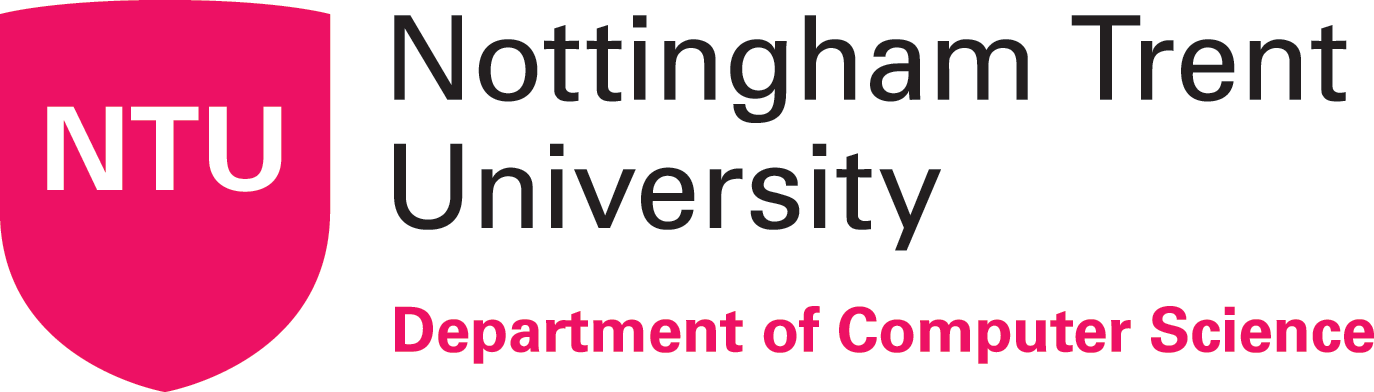

## SOFT40161 - Introduction to Computer Programming
## Submission of the Coursework

### Name: NWOGO EVERISTUS UGOCHUKWU
### NTU ID: N1280799

<font  color= 'red'> **The Full description of the Coursework is here -** </font>

<a href="https://now.ntu.ac.uk/d2l/le/content/1037562/viewContent/13280440/View">SOFT40161-Coursework (Click here)</a>

## Start your answer here-

<font  color= 'green'> **GitHub Link to access my work.** </font>

My GitHub Link: <a href="https://github.com/guavacoderepo/SOFT40161-COURSE-WORK.git"> (Click here)</a>

In [166]:
# import packages
import re
import pandas as pd
import seaborn as sns
from pandas.core.series import Series
from pandas.core.frame import DataFrame

In [167]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 7)

In [168]:
import warnings
warnings.filterwarnings('ignore')

# Section 1: Control Structures (16 marks)


In [3]:
# Explanation and Documentation 

In [169]:
# grouping ages into various categories
def group_age(age: int) -> str:
    if age <= 20:
        return '20 down'
    elif age <= 30:
        return '21-30'
    elif age <= 40:
        return '31-40'
    elif age <= 50:
        return '41-50'
    return '51 up'

# Evalauting percentage of missing values
def evalute_miss_values(df:DataFrame):
    miss_values = dict()
    for col in df.columns:
        val = (df[col].isnull().sum()/len(df))*100
        if val > 0:
            miss_values[col] = val

    return miss_values

# cleaning gender column using regular expression
def clean_gender(col: Series) -> Series:
    male_pattern = re.compile(r'\b(male(?:[-\s]?(?:leaning|ish|cis|trans))?|m(?:ale)?|man|guy|msle|mal(?:e|r)?|maile|mail)\b', re.IGNORECASE)
    female_pattern = re.compile(r'\b(female(?:[-\s]?(?:leaning|ish|cis|trans))?|f(?:emale)?|woman|femake|femail|trans[-\s]?female|cis[-\s]?female)\b', re.IGNORECASE)

    def classify_gender(gender):
        if male_pattern.search(gender):
            return 'Male'
        elif female_pattern.search(gender):
            return 'Female'
        return 'Others'

    return col.apply(classify_gender)

In [170]:
# To optimize the country column, let's group country by continent 
continents = {
    "North America": ['United States','Bahamas', 'Canada', 'Mexico', 'Costa Rica', 'Bahamas, The'],
    "Europe": ['United Kingdom', 'Bulgaria', 'France', 'Portugal', 'Netherlands', 'Switzerland', 'Poland', 'Germany', 'Slovenia', 'Austria', 'Ireland', 'Italy', 'Sweden', 'Latvia', 'Romania', 'Belgium', 'Spain', 'Finland', 'Bosnia and Herzegovina', 'Hungary', 'Croatia', 'Norway', 'Denmark', 'Greece', 'Moldova', 'Russia', 'Czech Republic'],
    "Oceania": ['Australia', 'New Zealand'],
    "South America": ['Brazil', 'Colombia', 'Uruguay'],
    "Africa": ['South Africa', 'Zimbabwe', 'Nigeria'],
    "Asia": ['India', 'Israel', 'Thailand', 'Singapore', 'Japan', 'China', 'Georgia', 'Philippines'],
}

def country_to_continent(Country:str):
    for continent, countries in continents.items():
        if Country in countries:
            return continent
    return 'Unknown'

In [ ]:
# Reflection on results 

# Section 2: Functions and Modules (16 marks)  

In [ ]:
# Explanation and Documentation 

In [172]:
# Pie chart plot function using ax
def plot_pie_chart(values: list, labels: list, title: str, colors=plt.cm.Paired.colors, ax=None):
    if ax is None:
        ax = plt.gca()
    ax.pie(values, labels=labels, 
           wedgeprops={'edgecolor': 'black', 'linewidth': 0.5}, 
           textprops={'fontsize': 11, 'weight': 'bold'}, 
           colors=colors, 
           autopct='%1.2f%%')
    ax.set_title(title, fontsize=15, weight='bold', color='darkblue')

# Doughnut chart plot function using ax
def plot_doughnut_chart(values: list, labels: list, title: str, colors=sns.color_palette("muted"), ax=None):
    if ax is None:
        ax = plt.gca()
    ax.pie(values, labels=labels, 
           wedgeprops={'edgecolor': 'black', 'linewidth': 0.5, 'width': 0.3}, 
           textprops={'fontsize': 11, 'weight': 'bold'}, 
           colors=colors, 
           startangle=90, 
           autopct='%1.2f%%')
    ax.set_title(title, fontsize=15, weight='bold', color='darkblue')

# Bar chart plot function using ax
def plot_bar_chart(x: list, y: list, title: str, ax=None):
    if ax is None:
        ax = plt.gca()
    ax.bar(x=x, height=y,
           color=plt.cm.Paired(range(len(x))), 
           edgecolor='black', 
           linewidth=0.8)
    ax.set_title(title, fontsize=15, weight='bold', color='darkblue')
    ax.set_xticklabels(x, rotation=60, fontsize=11)
    ax.grid(True, axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
    for index, value in enumerate(y):
        ax.text(x=index, y=value + 0.02 * max(y), s=f'{str(round(value, 3))}', ha='center')

# Count plot function using ax
def plot_count_plot(data: DataFrame, x: str, title: str, hue=None, ax=None):
    if ax is None:
        ax = plt.gca()
    sns.countplot(data=data, x=x, hue=hue, palette='Set2', ax=ax)
    ax.set_title(title, fontsize=16, weight='bold', color='darkblue')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=11, color='#34495e')
    ax.grid(True, axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
    for container in ax.containers:
        ax.bar_label(container)

In [173]:
def timestamp_formatter(df:DataFrame):
    # Convert 'Timestamp' column to datetime and extract year month
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    df['YearMonth'] = df['Timestamp'].dt.to_period('M')
    df.drop(columns=['Timestamp'],inplace=True)

In [174]:
# Reflection on results 

# Section 3: Data Handling with Pandas (16 marks)  

In [ ]:
# Explanation and Documentation 

In [237]:
# import dataset into pandas
url = 'dataset/survey.csv'
df = pd.read_csv(url)
df.head(2)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,8/27/2014 11:29,37,Female,United States,IL,NaN,No,Yes,Often,25-Jun,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,8/27/2014 11:29,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN


In [238]:
# Checking the shape of the dataset
size = df.shape
print(f'The dataset has {size[1]} columns and {size[0]} rows')

The dataset has 27 columns and 1259 rows


In [239]:
df.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [241]:
df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [242]:
# selecting revalevant columns for analysis
select_cols = ['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed', 'family_history', 'treatment', 'no_employees', 'work_interfere', 'wellness_program', 'leave', 'care_options', 'obs_consequence']

In [245]:
# drill down the demention of the dataset
df = df[select_cols]
df.head(2)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,no_employees,work_interfere,wellness_program,leave,care_options,obs_consequence
0,8/27/2014 11:29,37,Female,United States,IL,NaN,No,Yes,25-Jun,Often,No,Somewhat easy,Not sure,No
1,8/27/2014 11:29,44,M,United States,IN,NaN,No,No,More than 1000,Rarely,Don't know,Don't know,No,No


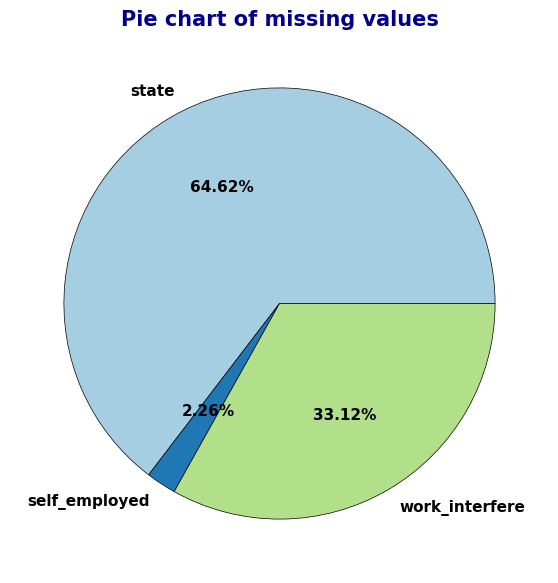

In [246]:
# ploting a pie chat of missing values
miss_values: dict = evalute_miss_values(df)
plot_pie_chart(list(miss_values.values()), list(miss_values.keys()), 'Pie chart of missing values')

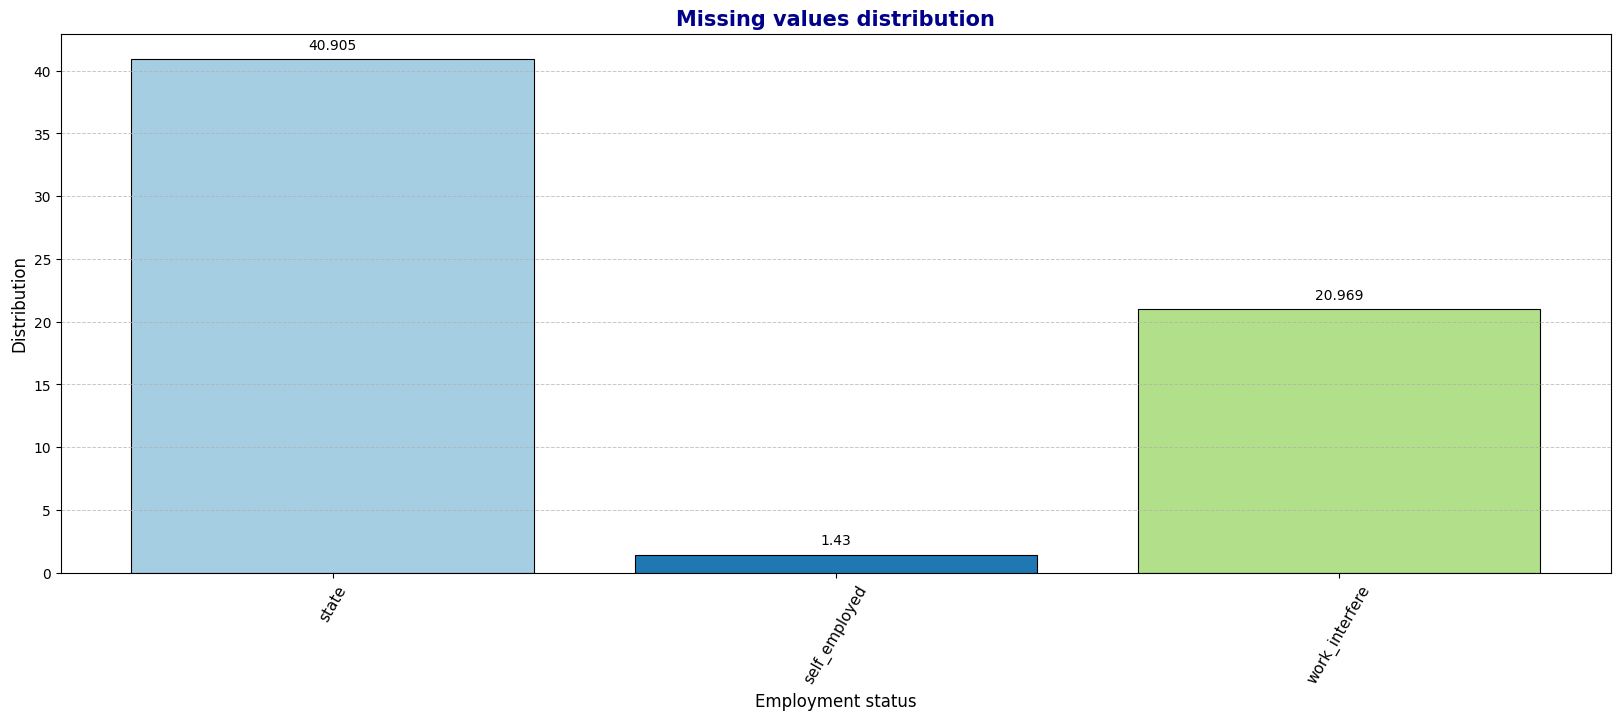

In [247]:
# Bar chart distribution of missing values
plot_bar_chart(miss_values.keys(), miss_values.values(), 'Missing values distribution')
plt.xlabel('Employment status', fontsize=12);
plt.ylabel('Distribution', fontsize=12);

In [248]:
# creating a new column of continents from countries
df['Continents'] = df['Country'].apply(lambda z: country_to_continent(z))

In [249]:
# grouping age 
df['Age'] = df['Age'].apply(group_age)
df.head(2)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,no_employees,work_interfere,wellness_program,leave,care_options,obs_consequence,Continents
0,8/27/2014 11:29,31-40,Female,United States,IL,NaN,No,Yes,25-Jun,Often,No,Somewhat easy,Not sure,No,North America
1,8/27/2014 11:29,41-50,M,United States,IN,NaN,No,No,More than 1000,Rarely,Don't know,Don't know,No,No,North America


In [250]:
# printing the unique values in gender column
df['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [251]:
# cleaning gender column
df['Gender'] = clean_gender(df['Gender'])
df.head(2)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,no_employees,work_interfere,wellness_program,leave,care_options,obs_consequence,Continents
0,8/27/2014 11:29,31-40,Female,United States,IL,NaN,No,Yes,25-Jun,Often,No,Somewhat easy,Not sure,No,North America
1,8/27/2014 11:29,41-50,Male,United States,IN,NaN,No,No,More than 1000,Rarely,Don't know,Don't know,No,No,North America


In [252]:
# fillna on self employed column
self_employed_mode = df['self_employed'].mode()[0]
df['self_employed'] = df['self_employed'].fillna(self_employed_mode)

df.head(2)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,no_employees,work_interfere,wellness_program,leave,care_options,obs_consequence,Continents
0,8/27/2014 11:29,31-40,Female,United States,IL,No,No,Yes,25-Jun,Often,No,Somewhat easy,Not sure,No,North America
1,8/27/2014 11:29,41-50,Male,United States,IN,No,No,No,More than 1000,Rarely,Don't know,Don't know,No,No,North America


In [253]:
# formate timestamp column
timestamp_formatter(df)

In [254]:
# drop all columns with missing values
df.dropna(axis=1, inplace=True)

In [255]:
# droping columns with missing values
df.isnull().sum()

Age                 0
Gender              0
Country             0
self_employed       0
family_history      0
treatment           0
no_employees        0
wellness_program    0
leave               0
care_options        0
obs_consequence     0
Continents          0
YearMonth           0
dtype: int64

In [256]:
df.head()

,Age,Gender,Country,self_employed,family_history,treatment,no_employees,wellness_program,leave,care_options,obs_consequence,Continents,YearMonth
0,31-40,Female,United States,No,No,Yes,25-Jun,No,Somewhat easy,Not sure,No,North America,2014-08
1,41-50,Male,United States,No,No,No,More than 1000,Don't know,Don't know,No,No,North America,2014-08
2,31-40,Male,Canada,No,No,No,25-Jun,No,Somewhat difficult,No,No,North America,2014-08
3,31-40,Male,United Kingdom,No,Yes,Yes,26-100,No,Somewhat difficult,Yes,Yes,Europe,2014-08
4,31-40,Male,United States,No,No,No,100-500,Don't know,Don't know,No,No,North America,2014-08


In [257]:
# let's filter male with mental health
staff_with_mental_health = df[(df['obs_consequence'] == 'Yes') & (df['Gender'] == 'Male')].reset_index(drop=True)

staff_with_mental_health.head(5)

,Age,Gender,Country,self_employed,family_history,treatment,no_employees,wellness_program,leave,care_options,obs_consequence,Continents,YearMonth
0,31-40,Male,United Kingdom,No,Yes,Yes,26-100,No,Somewhat difficult,Yes,Yes,Europe,2014-08
1,41-50,Male,United States,Yes,Yes,No,5-Jan,Yes,Very easy,Not sure,Yes,North America,2014-08
2,31-40,Male,United States,Yes,Yes,No,5-Jan,No,Somewhat difficult,Yes,Yes,North America,2014-08
3,21-30,Male,United Kingdom,No,No,Yes,25-Jun,No,Don't know,No,Yes,Europe,2014-08
4,41-50,Male,United States,No,Yes,Yes,More than 1000,No,Don't know,No,Yes,North America,2014-08


In [258]:
# group gender by number observation
gender_grouped = df.groupby(['obs_consequence', 'Gender']).size().reset_index(name='observations')

gender_grouped

,obs_consequence,Gender,observations
0,No,Female,202
1,No,Male,861
2,No,Others,12
3,Yes,Female,49
4,Yes,Male,130
5,Yes,Others,5


In [259]:
# group countries by number 
countries_grouped = df.groupby(['obs_consequence', 'Country']).size().reset_index(name='observations')

countries_grouped

,obs_consequence,Country,observations
0,No,Australia,13
1,No,Austria,3
2,No,Belgium,4
3,No,Brazil,3
4,No,Bulgaria,3
...,...,...,...
63,Yes,South Africa,3
64,Yes,Sweden,1
65,Yes,United Kingdom,37
66,Yes,United States,89


In [260]:
# people that filled the survey in 2014
df_2014 = df[df['YearMonth'].dt.year == 2014] 

df_2014

,Age,Gender,Country,self_employed,family_history,treatment,no_employees,wellness_program,leave,care_options,obs_consequence,Continents,YearMonth
0,31-40,Female,United States,No,No,Yes,25-Jun,No,Somewhat easy,Not sure,No,North America,2014-08
1,41-50,Male,United States,No,No,No,More than 1000,Don't know,Don't know,No,No,North America,2014-08
2,31-40,Male,Canada,No,No,No,25-Jun,No,Somewhat difficult,No,No,North America,2014-08
3,31-40,Male,United Kingdom,No,Yes,Yes,26-100,No,Somewhat difficult,Yes,Yes,Europe,2014-08
4,31-40,Male,United States,No,No,No,100-500,Don't know,Don't know,No,No,North America,2014-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,21-30,Female,United States,No,No,No,100-500,Don't know,Don't know,Not sure,No,North America,2014-11
1186,51 up,Female,United States,Yes,No,No,5-Jan,Don't know,Don't know,Not sure,No,North America,2014-11
1187,31-40,Male,United States,No,Yes,Yes,26-100,No,Don't know,No,No,North America,2014-11
1188,31-40,Female,Belgium,No,No,No,26-100,No,Very easy,Not sure,No,Europe,2014-12


In [ ]:
# Reflection on results 

# Section 4: Data Visualization (16 marks)  

In [ ]:
# Explanation and Documentation 

#### Univariant Analysis

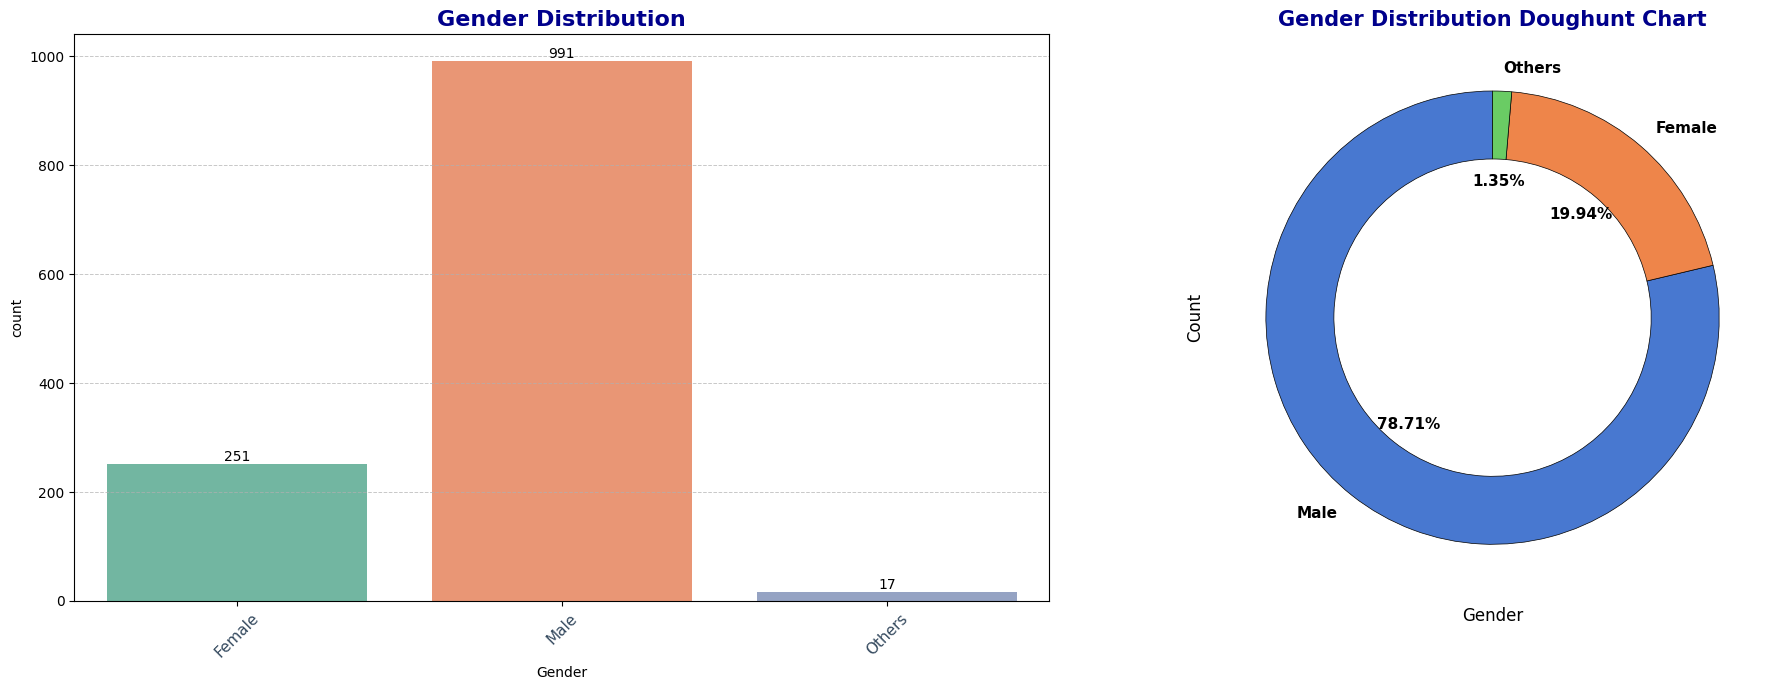

In [261]:
fig, (ax1, ax2) = plt.subplots(1, 2)

plot_count_plot(df, 'Gender', 'Gender Distribution', ax=ax1);
plt.xlabel('Gender', fontsize=12);
plt.ylabel('Count', fontsize=12);

values = df['Gender'].value_counts()
labels = values.index
plot_doughnut_chart(values, labels,"Gender Distribution Doughunt Chart",  ax=ax2);
plt.tight_layout()

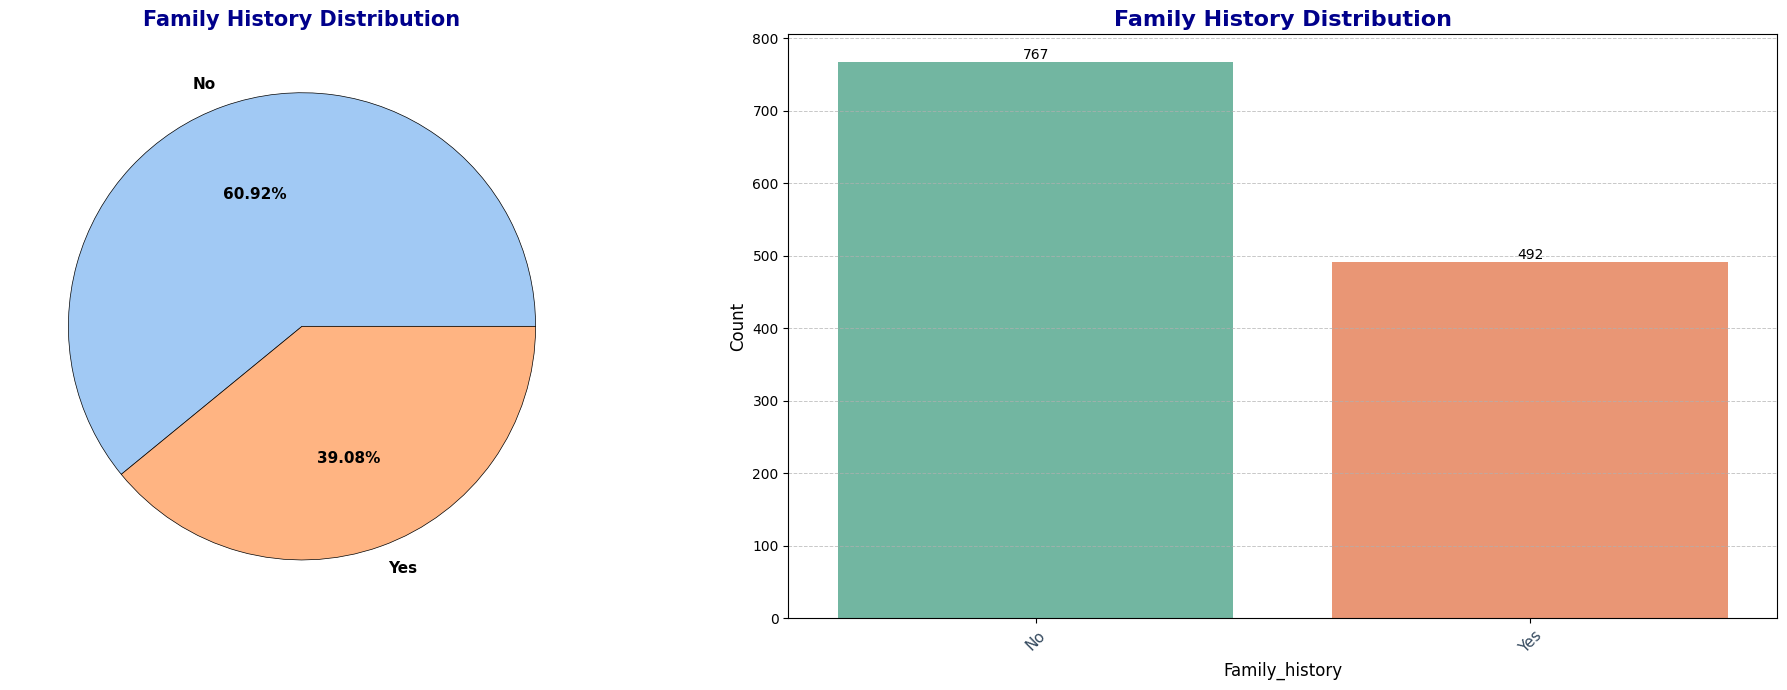

In [262]:

fig, (ax1, ax2) = plt.subplots(1, 2)
values = df['family_history'].value_counts()
labels = values.index
plot_pie_chart(values, labels, 'Family History Distribution', sns.color_palette('pastel'), ax=ax1)

plot_count_plot(df, 'family_history', 'Family History Distribution', ax=ax2);
plt.xlabel('Family_history', fontsize=12);
plt.ylabel('Count', fontsize=12);

plt.tight_layout()

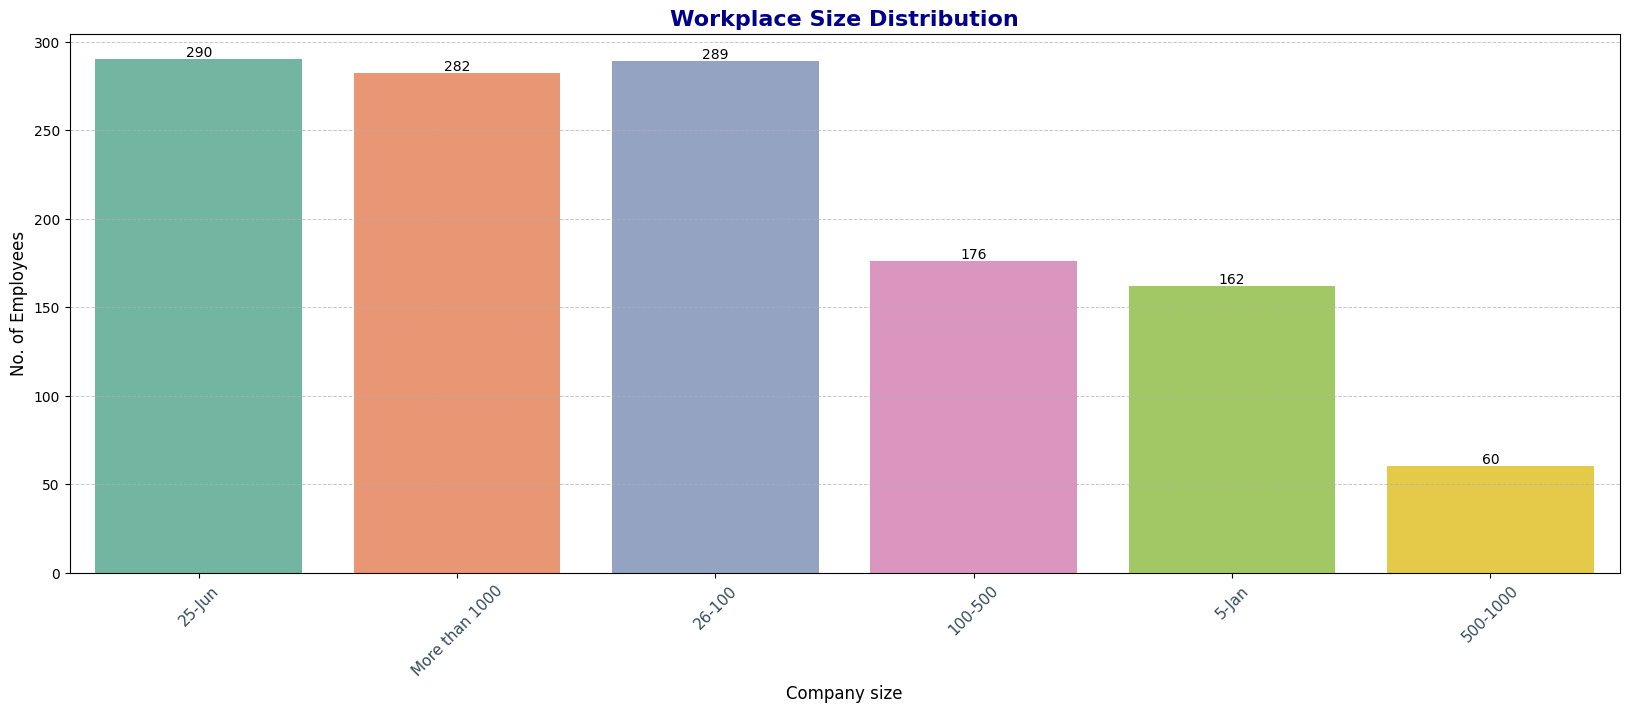

In [263]:
# no of employee distribution
plot_count_plot(df, 'no_employees', 'Workplace Size Distribution')
plt.xlabel('Company size', fontsize=12)
plt.ylabel('No. of Employees', fontsize=12);

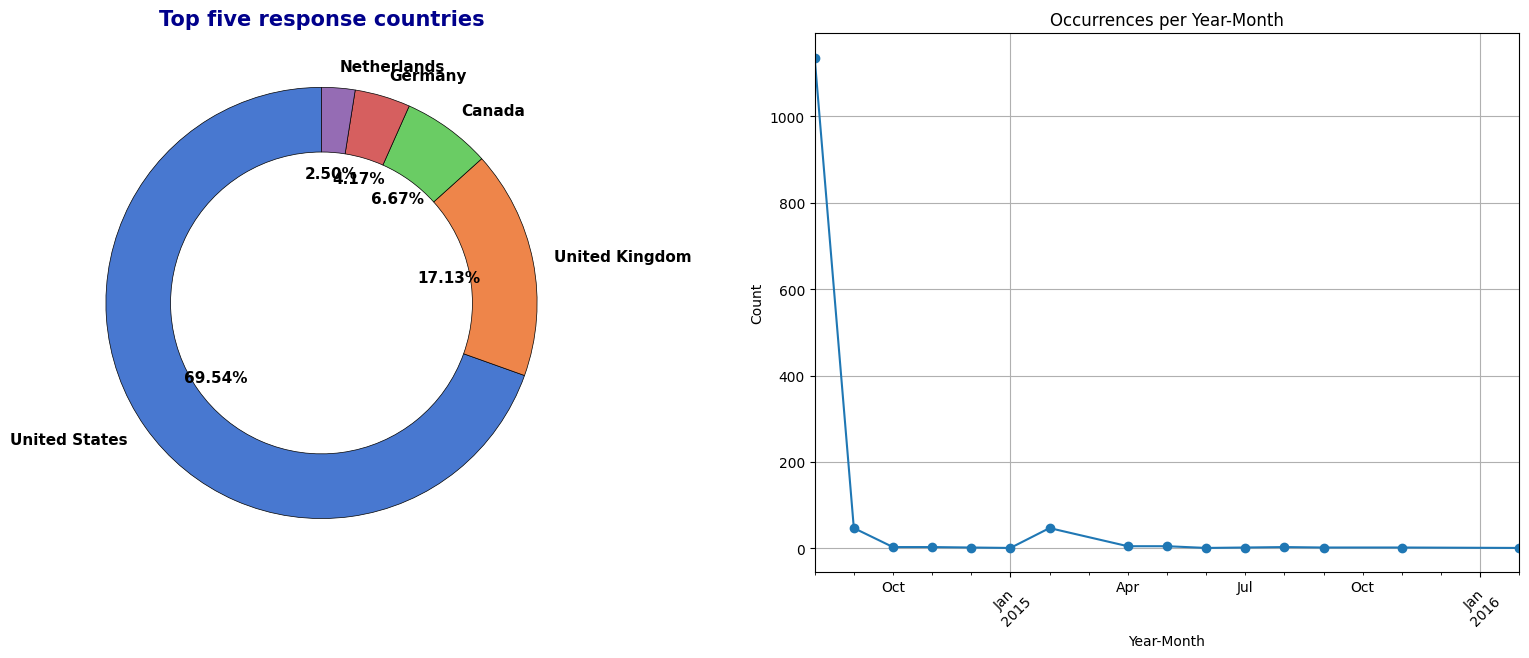

In [273]:
fig, (ax1, ax2) = plt.subplots(1, 2)
# Distribution of the how individuals response to the survey
duration_value = df.groupby('YearMonth')['YearMonth'].value_counts()

duration_value.plot(kind='line', marker='o', ax=ax2)
plt.title('Occurrences per Year-Month')
plt.xlabel('Year-Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)

# top five countries chart
values = df['Country'].value_counts().head(5)
labels = values.index

plot_doughnut_chart(values, labels,"Top five response countries", ax=ax1)

#### Bivariant Analysis

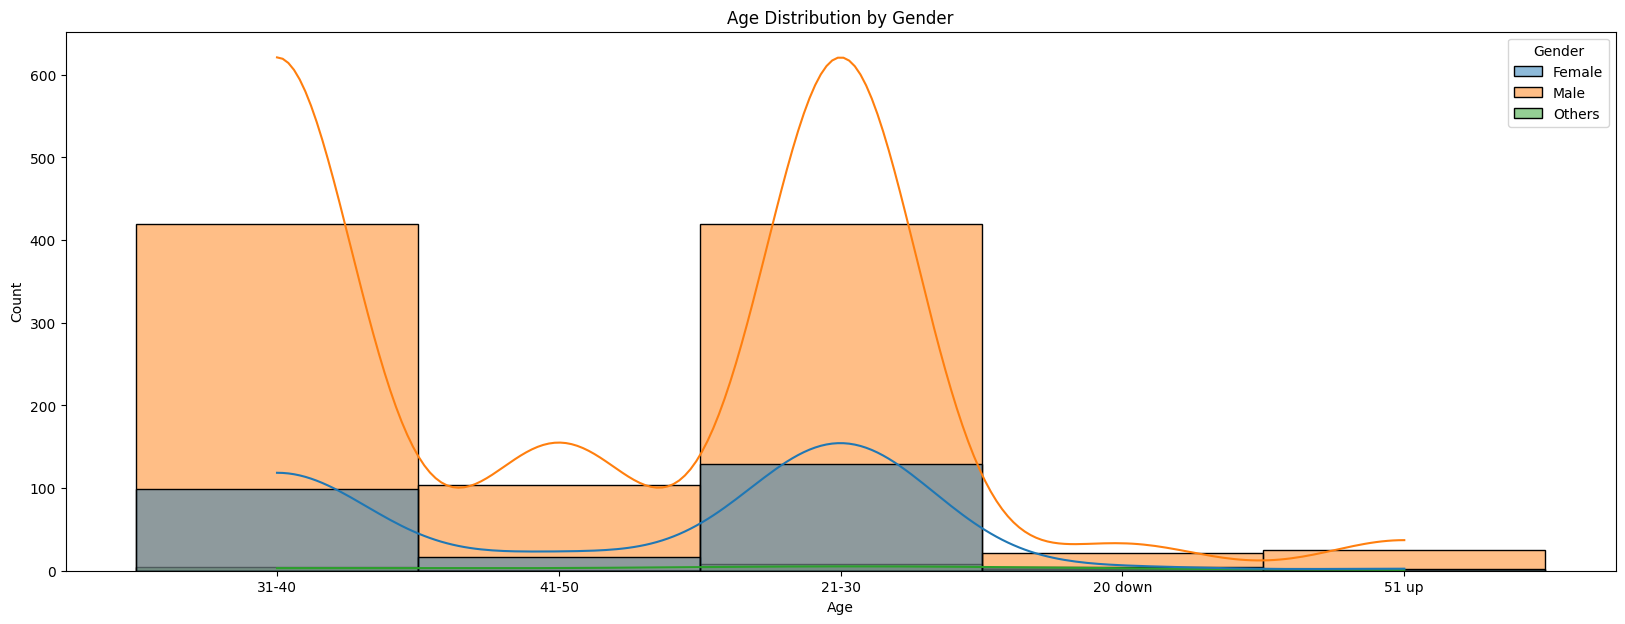

In [265]:
# Analyze the distribution of ages across different genders.
sns.histplot(data=df, x='Age', hue='Gender', kde=True, bins=20)
plt.title('Age Distribution by Gender')
plt.show()

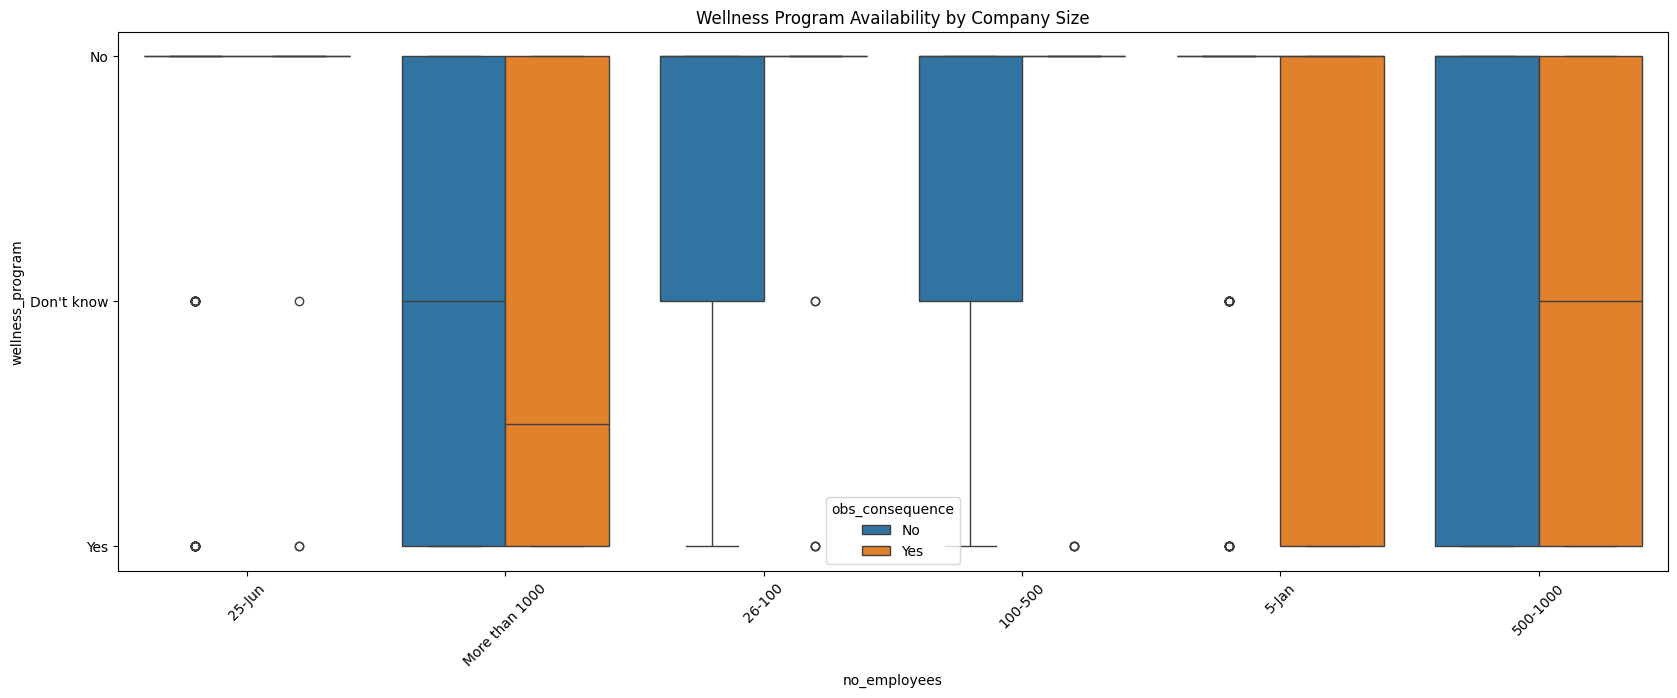

In [266]:
# To analyze the availability and participation in wellness programs based on the number of employees.
sns.boxplot(data=df, x='no_employees', y='wellness_program', hue='obs_consequence')
plt.title('Wellness Program Availability by Company Size')
plt.xticks(rotation=45)
plt.show()

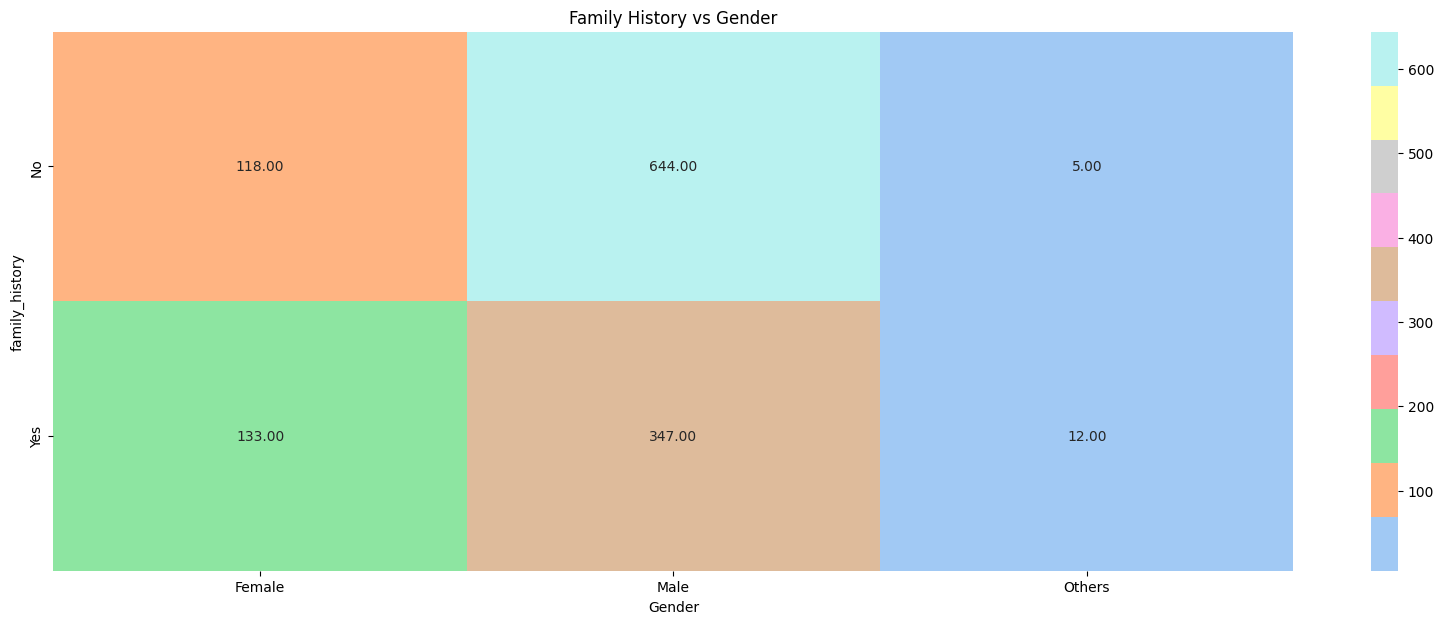

In [235]:
family_treatment = df.groupby(['family_history', 'Gender']).size().unstack()
sns.heatmap(family_treatment, annot=True, fmt='.2f', cmap=sns.color_palette('pastel'))
plt.title('Family History vs Gender');

Text(0.5, 1.0, 'Treatment Status by Continents')

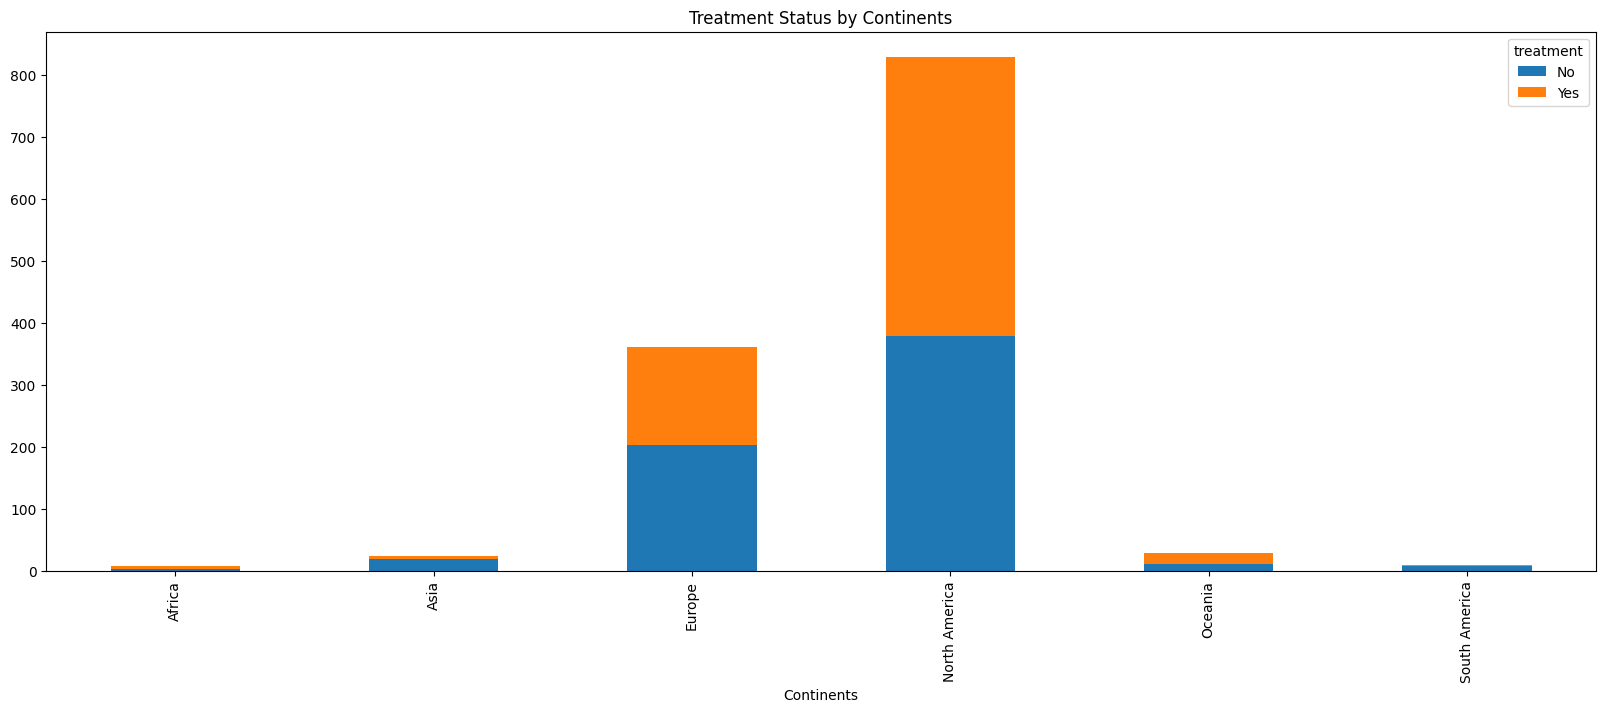

In [203]:
# To identify trends in treatment-seeking behavior across Continents.
treatment_counts = df.groupby('Continents')['treatment'].value_counts().unstack()
treatment_counts.plot(kind='bar', stacked=True)
plt.title('Treatment Status by Continents')

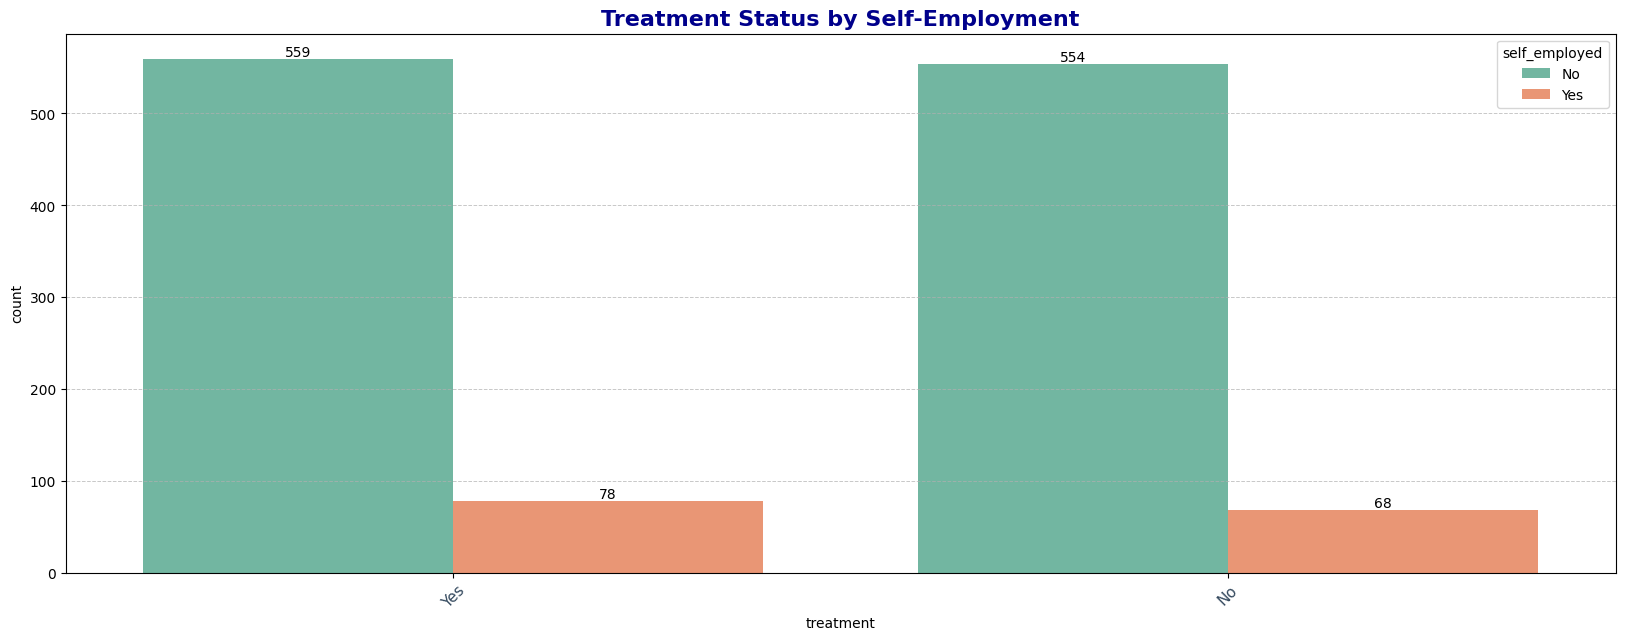

In [271]:
# To compare the proportion of individuals seeking treatment based on their self-employment status.
plot_count_plot(data=df, x='treatment', hue='self_employed', title='Treatment Status by Self-Employment')

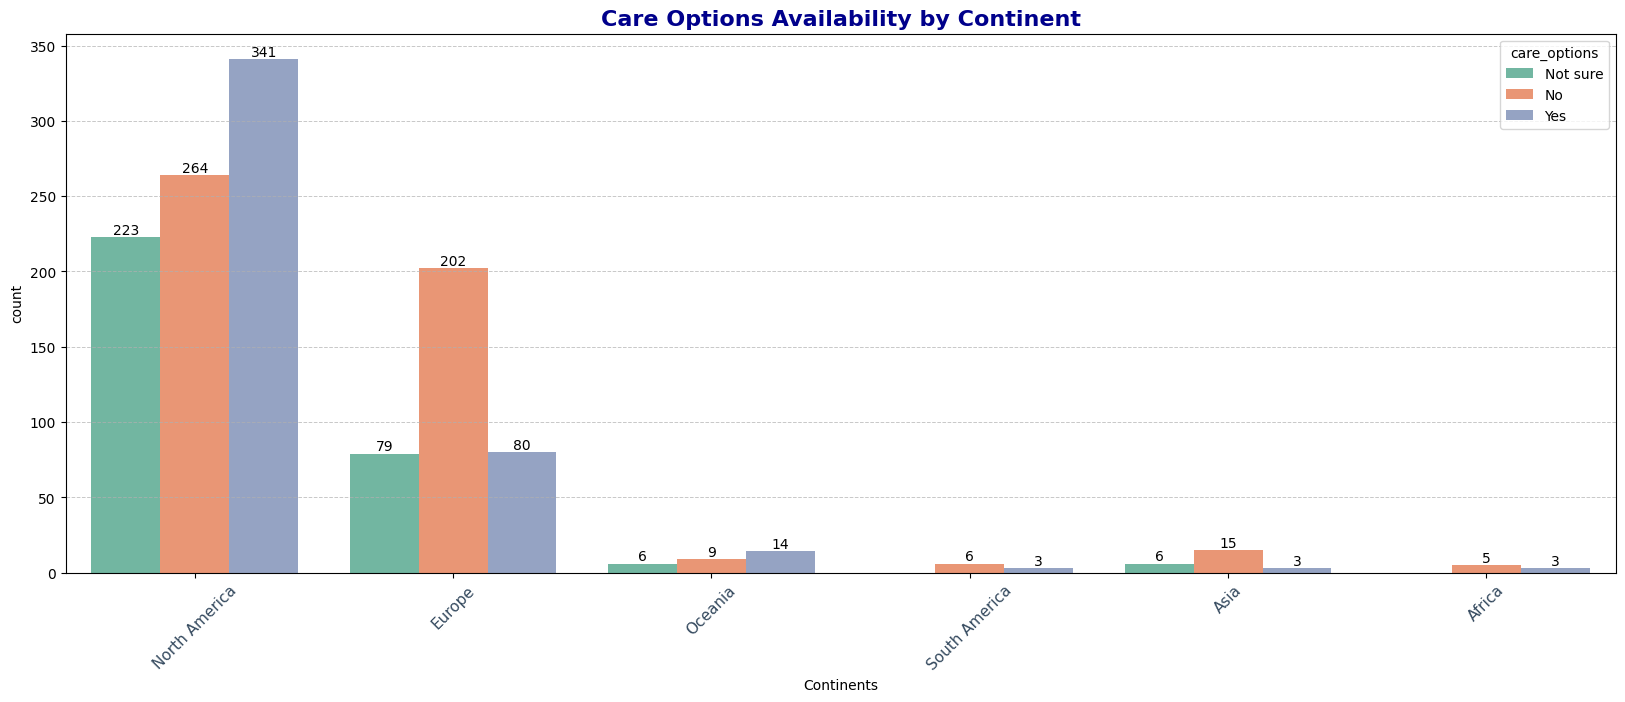

In [268]:
# To examine the distribution of care options across continents.
plot_count_plot(data=df, x='Continents', hue='care_options', title='Care Options Availability by Continent')

In [68]:
# g=sns.catplot(data=df, kind='count', x='Continents', hue='Gender');
# plt.xticks(rotation=90, fontsize=10);

# for ax in g.axes.flat:
#     for p in ax.patches:
#         ax.annotate(f'{int(p.get_height())}', 
#             (p.get_x() + p.get_width() / 2., p.get_height()), 
#             ha='center', va='center', fontsize=10, 
#             color='black', xytext=(0, 5), textcoords='offset points')

In [31]:
# sns.pairplot(df, diag_kind='hist');

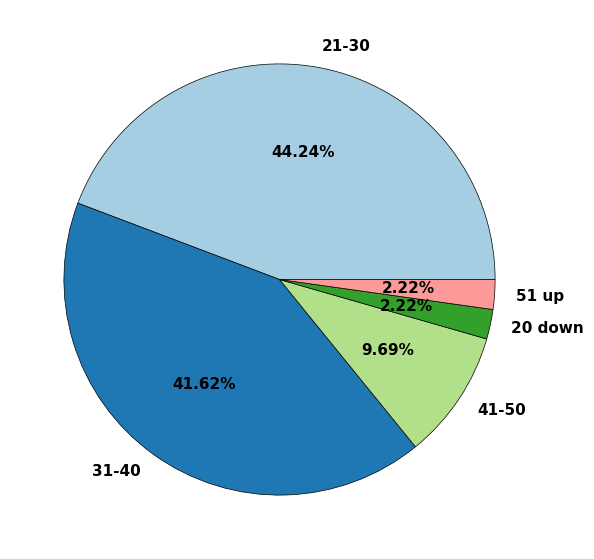

In [226]:
# check age distribution
age_title = df['Age'].value_counts().index
age_counts = df['Age'].value_counts().values

plot_pie_chart(age_counts, age_title,'')

In [ ]:
# Reflection on results 

# Section 5: GUI Development (16 marks)  

In [ ]:
# Explanation and Documentation 

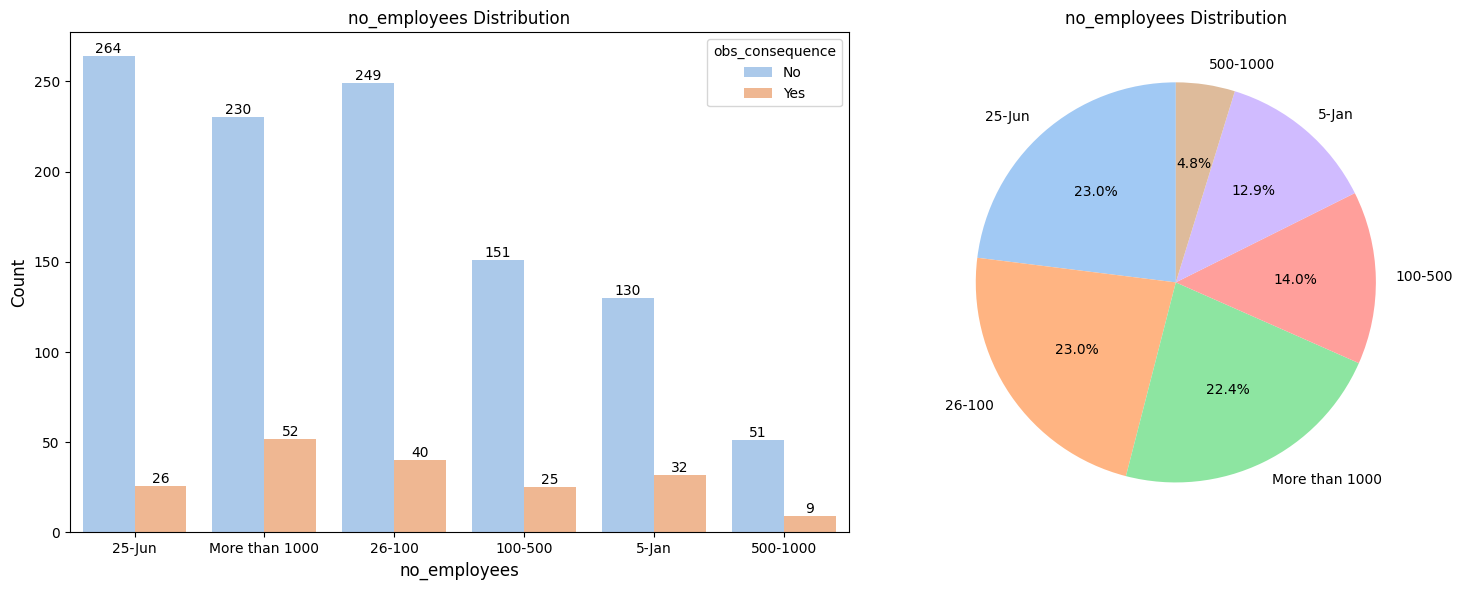

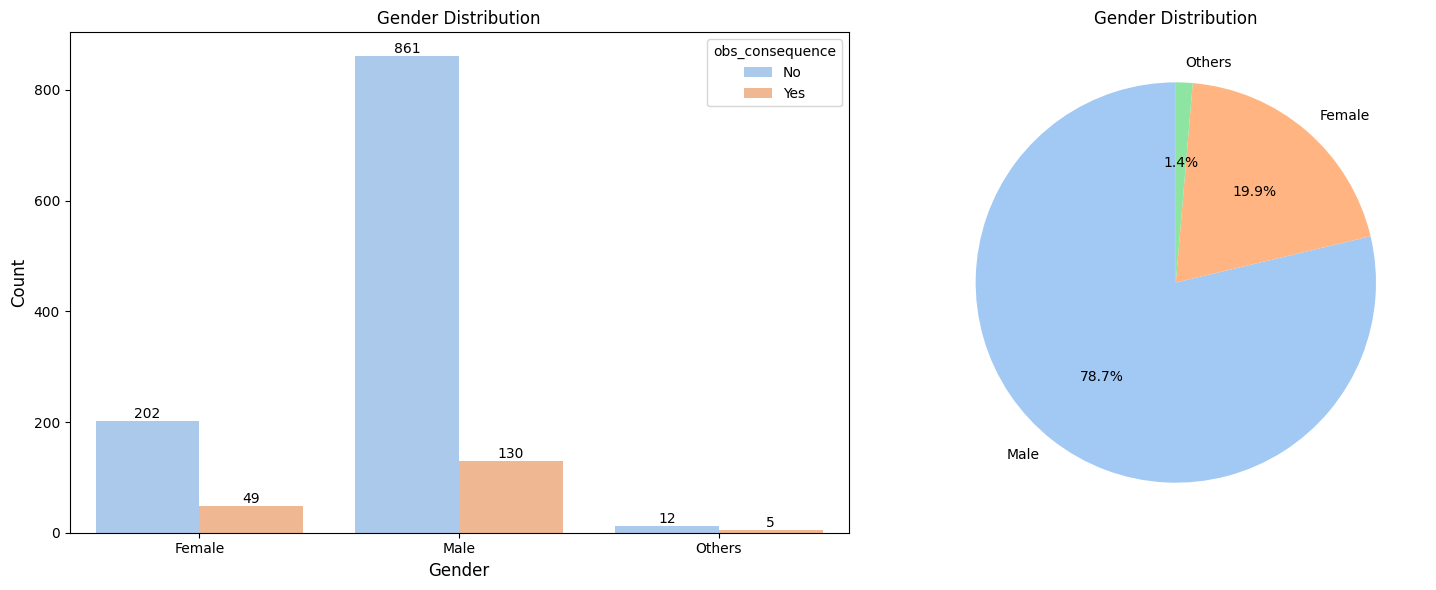

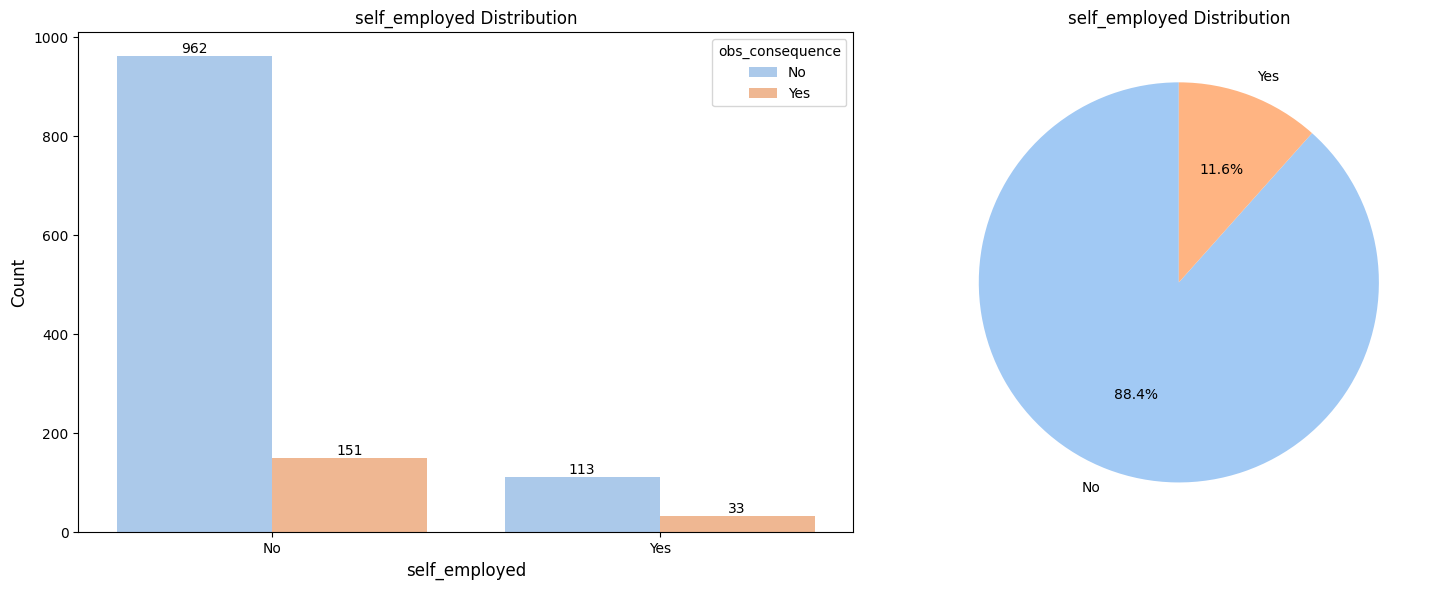

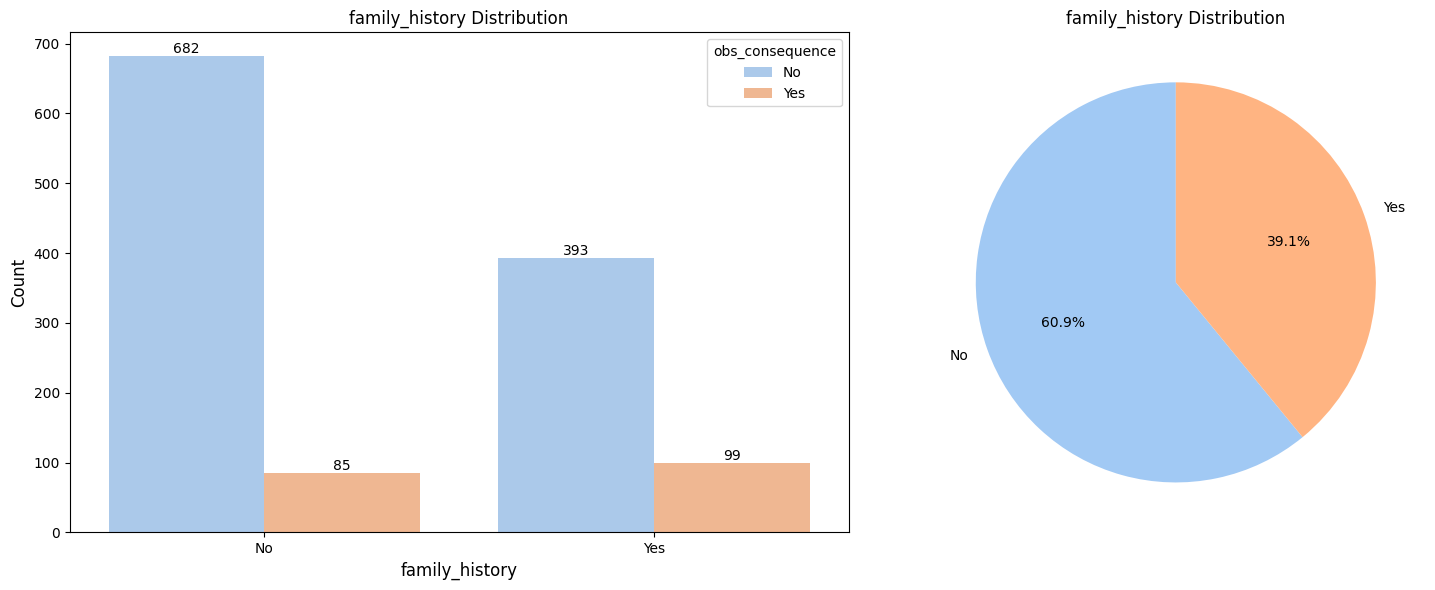

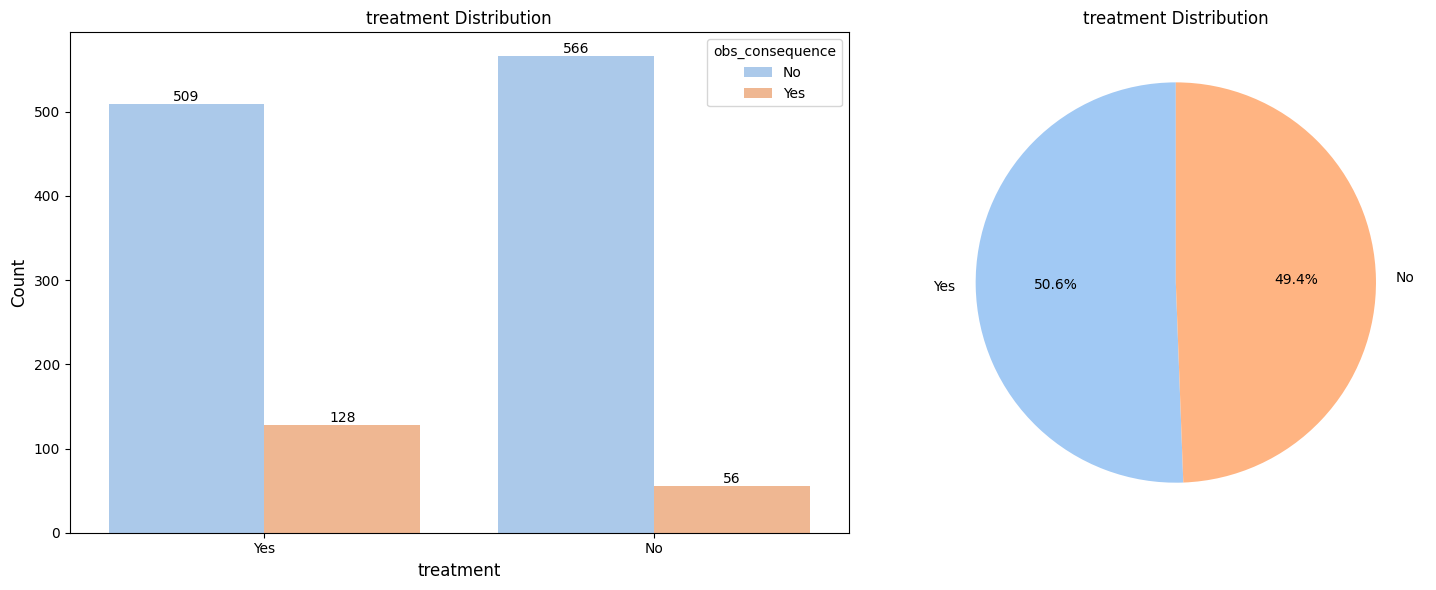

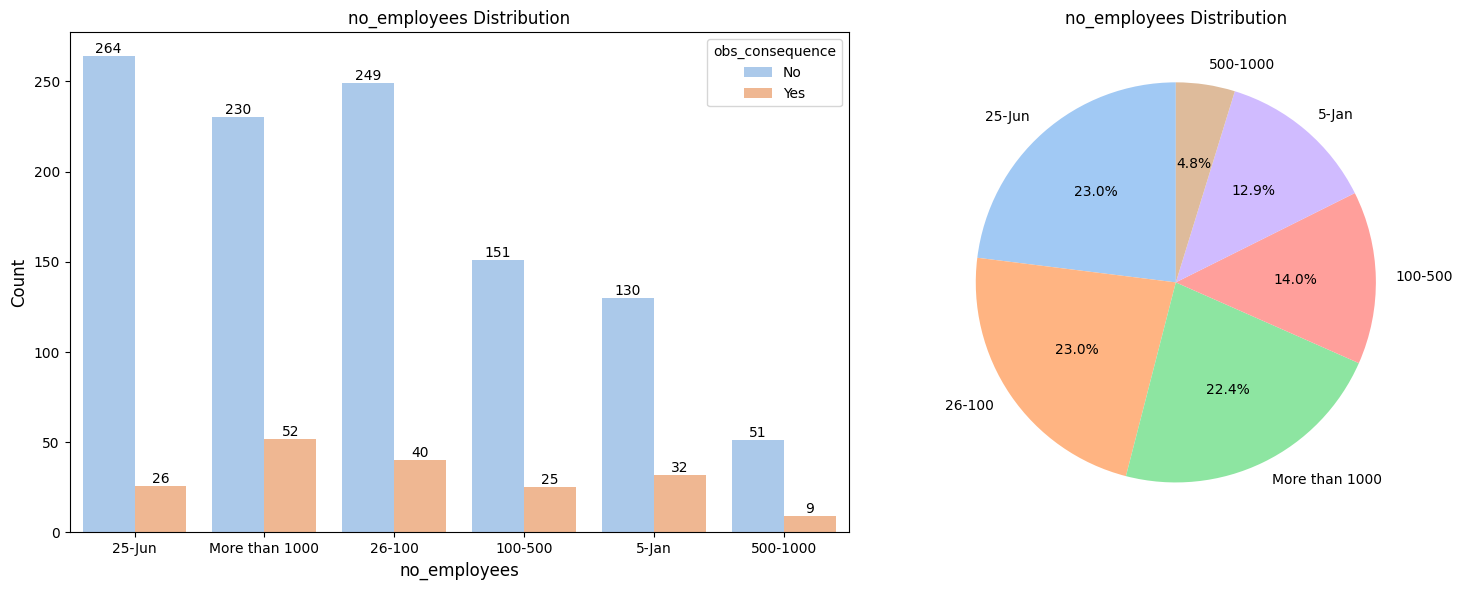

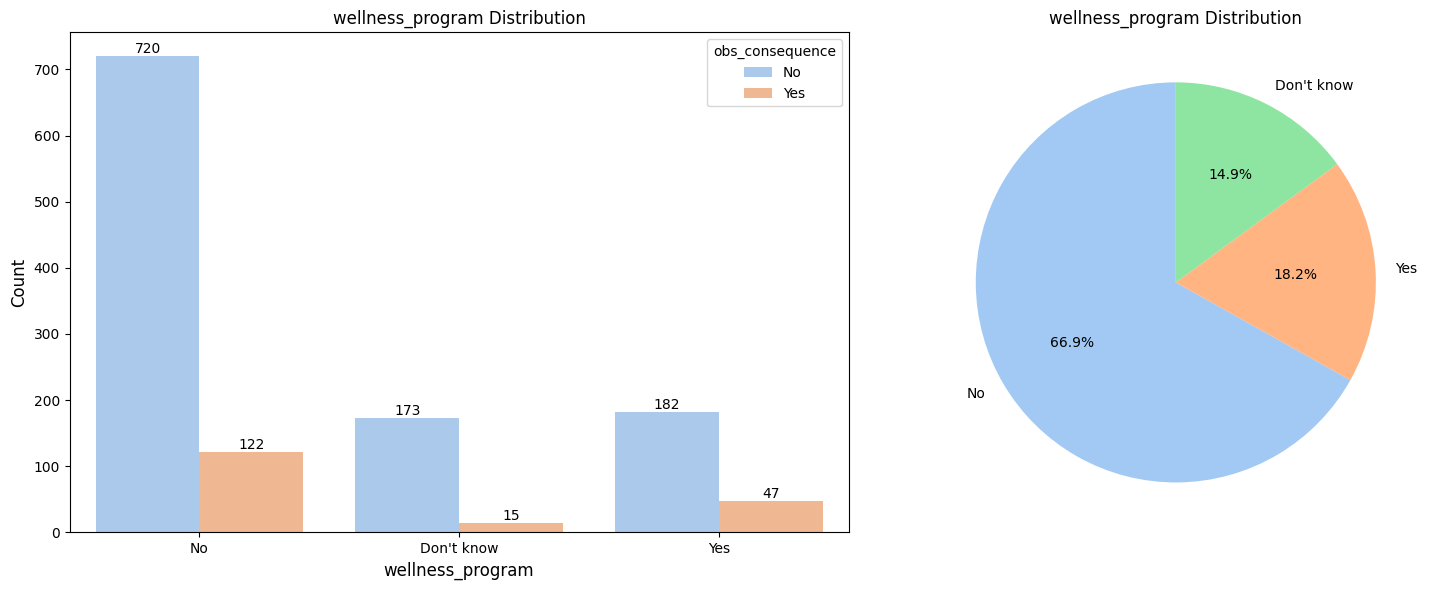

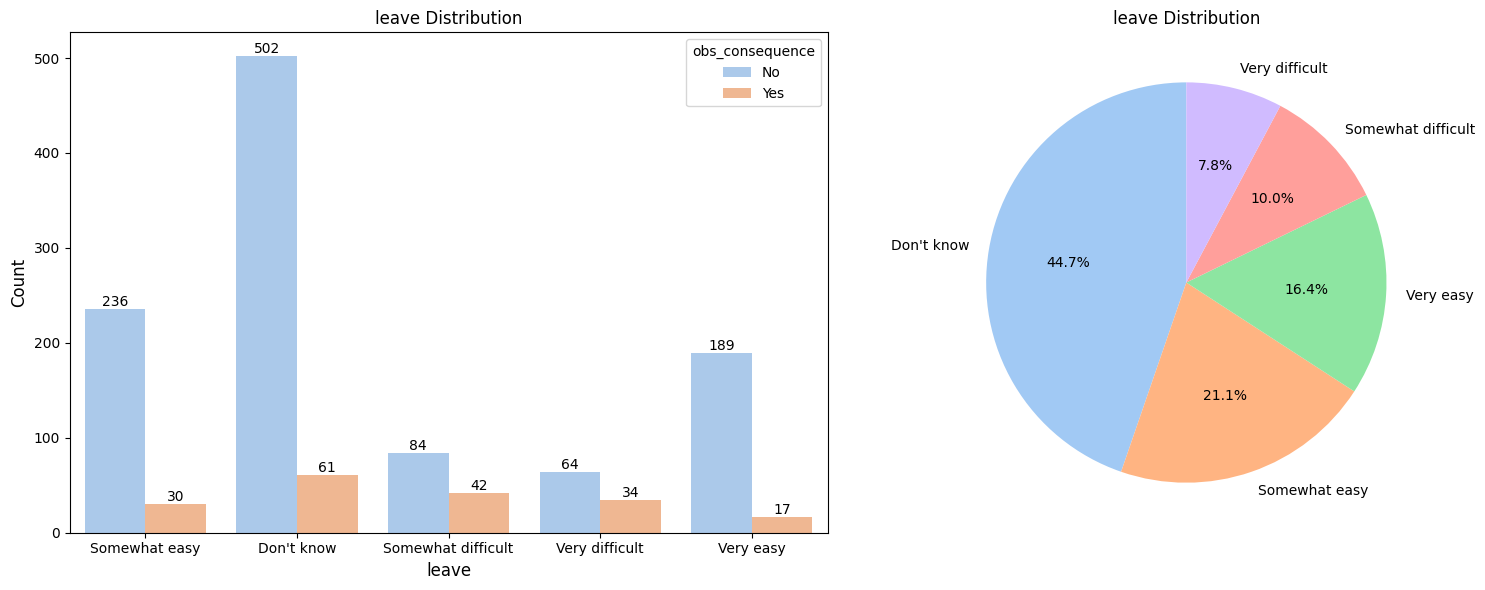

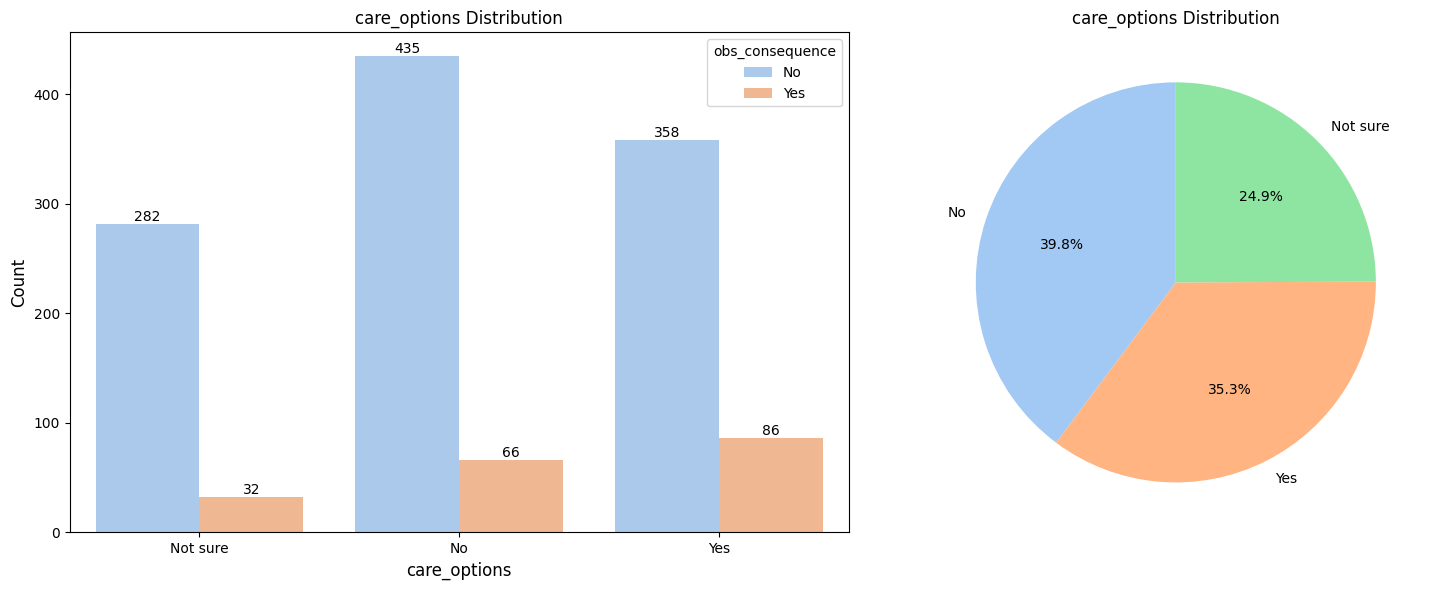

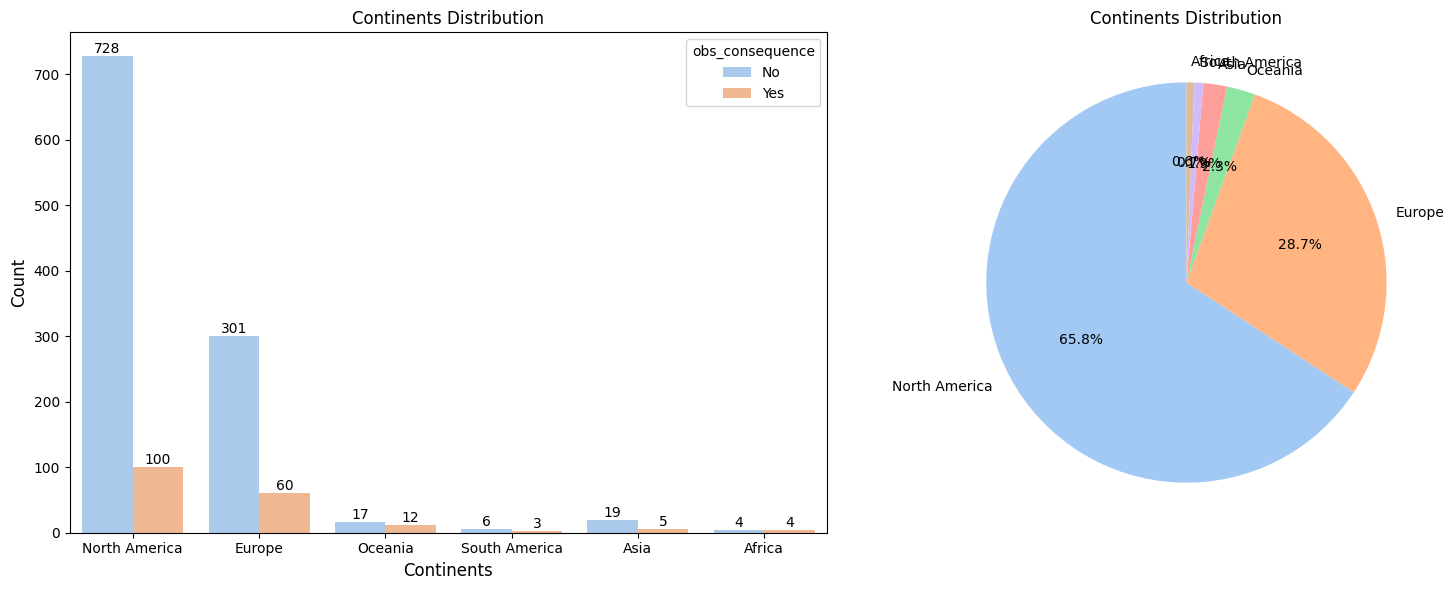

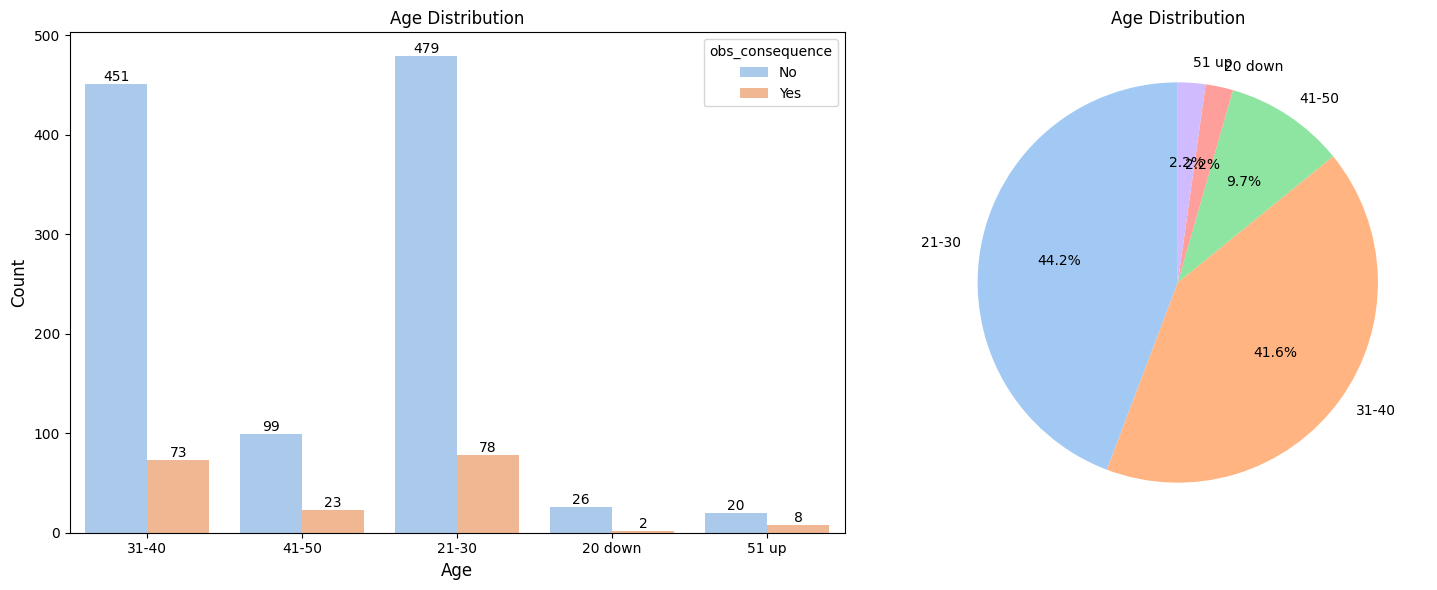

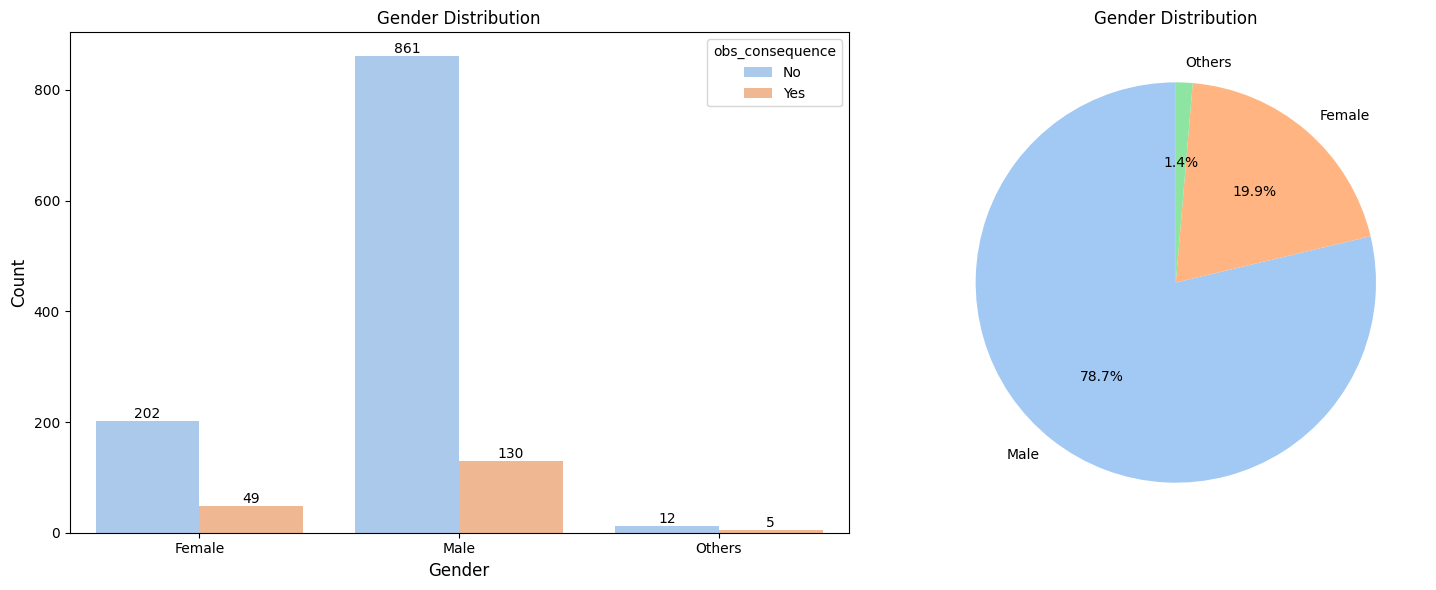

In [224]:
import tkinter as tk
from tkinter import ttk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# get all columns and remove the target, YearMonth and country column
plot_cols = [col for col in df.columns if col not in ['Country', 'obs_consequence', 'YearMonth']]
cols_index = 0

# Function to update the plot in the GUI
def update_plot(fig):
    for widget in frame_plot.winfo_children():
        widget.destroy()
    canvas = FigureCanvasTkAgg(fig, master=frame_plot)
    canvas.draw()
    canvas.get_tk_widget().pack(fill=tk.BOTH, anchor='center')

def dynamic_count_plot(df: pd.DataFrame, xColumn: str, hueColumn: str='obs_consequence'):
    # Create a figure and two subplots (axes)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

    # Count plot for xColumn distribution
    sns.countplot(data=df, x=xColumn,hue=hueColumn, ax=ax1, palette='pastel')
    ax1.set_title(f'{xColumn} Distribution')
    ax1.set_xlabel(xColumn, fontsize=12)
    ax1.set_ylabel('Count', fontsize=12)
    for container in ax1.containers:
        ax1.bar_label(container)

    # Pie chart for obs_consequence distribution
    x_counts = df[xColumn].value_counts()
    ax2.pie(x_counts, labels=x_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel').as_hex())
    ax2.set_title(f'{xColumn} Distribution')

    # Adjust layout
    plt.tight_layout()
    # update lable text

    # dynamic_label_text(xColumn, hueColumn)
    update_plot(fig)

# def dynamic_label_text(df:DataFrame, xColumn, hueColumn):
#     df

#     txt = f'The plot above shows that '
#     pass

def on_previous():
    global cols_index, cols, xColumn
    cols_index -= 1
    if cols_index < 0:
        cols_index = len(cols)-1
    
    xColumn = cols[cols_index]
    dynamic_count_plot(df, xColumn)

def on_next():
    global cols_index, plot_cols
    cols_index += 1
    if cols_index > len(cols)-1:
        cols_index = 0
    
    xColumn = plot_cols[cols_index]
    dynamic_count_plot(df, xColumn)
    
# Create main application window
root = tk.Tk()
root.title("Dynamic Mental Health Survey Relationships")
root.geometry("1800x750")

# Configure grid layout
root.columnconfigure(0, weight=1)
root.columnconfigure(1, weight=3)
root.rowconfigure(0, weight=1)

# Frame for controls
left_frame = ttk.Frame(root, padding=10)
left_frame.grid(row=0, column=0, sticky="ns")

# Frame for plot
frame_plot = ttk.Frame(root, padding=10)
frame_plot.grid(row=0, column=1, sticky="ns")

# Frame for navigation buttons
nav_frame = ttk.Frame(root, padding=10)
nav_frame.grid(row=0, column=2, sticky="ns")

# Previous and Next buttons
prev_button = ttk.Button(nav_frame, text="Previous", command=on_previous)
prev_button.pack(side=tk.LEFT, padx=5)

next_button = ttk.Button(nav_frame, text="Next", command=on_next)
next_button.pack(side=tk.RIGHT, padx=5)

# Add a default plot
dynamic_count_plot(df=df, xColumn='no_employees')

# Text label below the plot

# text_label = ttk.Label(frame_plot, text="This is a text label below the chart.", font=("Helvetica", 12))
# text_label.pack(pady=10)

# Run the main event loop
root.mainloop()


In [ ]:
# import tkinter as tk
# from tkinter import ttk
# import seaborn as sns
# import matplotlib.pyplot as plt
# from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
# import pandas as pd
# import numpy as np

# # Sample dataset
# np.random.seed(42)
# df = pd.DataFrame({
#     'Age': np.random.randint(18, 60, 100),
#     'Gender': np.random.choice(['Male', 'Female'], 100),
#     'Treatment': np.random.choice(['Yes', 'No'], 100),
#     'Continents': np.random.choice(['North America', 'Europe', 'Asia'], 100),
#     'Scores': np.random.randint(50, 100, 100)
# })

# # Functions for plotting complex charts
# def plot_stacked_bar_chart():
#     pivot = pd.crosstab(df['Continents'], df['Gender'])
#     fig, ax = plt.subplots(figsize=(8, 5))
#     pivot.plot(kind='bar', stacked=True, color=['#FF5733', '#33FF57'], ax=ax)
#     ax.set_title('Stacked Bar Chart: Gender by Continent', fontsize=14)
#     ax.set_ylabel('Counts')
#     ax.legend(title="Gender")
#     style_plot(ax)
#     update_plot(fig)

# def plot_heatmap():
#     pivot = pd.crosstab(df['Continents'], df['Treatment'])
#     fig, ax = plt.subplots(figsize=(8, 5))
#     sns.heatmap(pivot, annot=True, cmap='coolwarm', fmt='d', cbar=True, ax=ax)
#     ax.set_title('Heatmap: Treatment by Continent', fontsize=14)
#     update_plot(fig)

# def plot_scatter_with_regression():
#     fig, ax = plt.subplots(figsize=(8, 5))
#     sns.scatterplot(data=df, x='Age', y='Scores', hue='Gender', style='Treatment', palette='cool', ax=ax)
#     sns.regplot(data=df, x='Age', y='Scores', scatter=False, ax=ax, color='black', ci=None)
#     ax.set_title('Scatter Plot with Regression Line', fontsize=14)
#     ax.set_xlabel('Age')
#     ax.set_ylabel('Scores')
#     style_plot(ax)
#     update_plot(fig)

# # Function to style plots
# def style_plot(ax):
#     ax.spines['top'].set_visible(False)
#     ax.spines['right'].set_visible(False)
#     ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
#     ax.tick_params(axis='x', labelsize=10)
#     ax.tick_params(axis='y', labelsize=10)

# # Function to update the plot in the GUI
# def update_plot(fig):
#     for widget in frame_plot.winfo_children():
#         widget.destroy()
#     canvas = FigureCanvasTkAgg(fig, master=frame_plot)
#     canvas.draw()
#     canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)

# # Callback for dropdown menu
# def on_dropdown_change(event):
#     chart_type = chart_var.get()
#     if chart_type == "Stacked Bar Chart":
#         plot_stacked_bar_chart()
#     elif chart_type == "Heatmap":
#         plot_heatmap()
#     elif chart_type == "Scatter Plot with Regression":
#         plot_scatter_with_regression()

# # Create main application window
# root = tk.Tk()
# root.title("Complex Data Visualization")

# # Configure grid layout
# root.columnconfigure(0, weight=1)
# root.columnconfigure(1, weight=3)
# root.rowconfigure(0, weight=1)

# # Frame for controls
# frame_controls = ttk.Frame(root, padding=10)
# frame_controls.grid(row=0, column=0, sticky="ns")

# # Frame for plot
# frame_plot = ttk.Frame(root, padding=10)
# frame_plot.grid(row=0, column=1, sticky="nsew")

# # Dropdown menu for chart selection
# chart_var = tk.StringVar(value="Stacked Bar Chart")
# dropdown = ttk.Combobox(frame_controls, textvariable=chart_var, state="readonly", width=25)
# dropdown['values'] = ["Stacked Bar Chart", "Heatmap", "Scatter Plot with Regression"]
# dropdown.bind("<<ComboboxSelected>>", on_dropdown_change)
# dropdown.pack(pady=10)

# # Add styling
# style = ttk.Style()
# style.theme_use('clam')
# style.configure("TFrame", background="#E6E6FA")
# style.configure("TLabel", background="#E6E6FA", font=('Helvetica', 12))
# style.configure("TCombobox", font=('Helvetica', 12))

# # Title label
# title_label = ttk.Label(frame_controls, text="Select Complex Chart Type", font=("Helvetica", 14, "bold"), foreground="#4B0082")
# title_label.pack(pady=10)

# # Add a default plot
# plot_stacked_bar_chart()

# # Run the main event loop
# root.mainloop()


In [ ]:
# Reflection on results 

# Section 6: Conclusion: Version Control, Critical Appraisal, Documentation (20 marks)  

In [ ]:
# Explanation and Documentation 

# References:


# Appendix:

(If any)